In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("global_cancer_patients_2015_2024.csv")

In [3]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [5]:
data.duplicated().sum()

np.int64(0)

## Descriptive  analysis

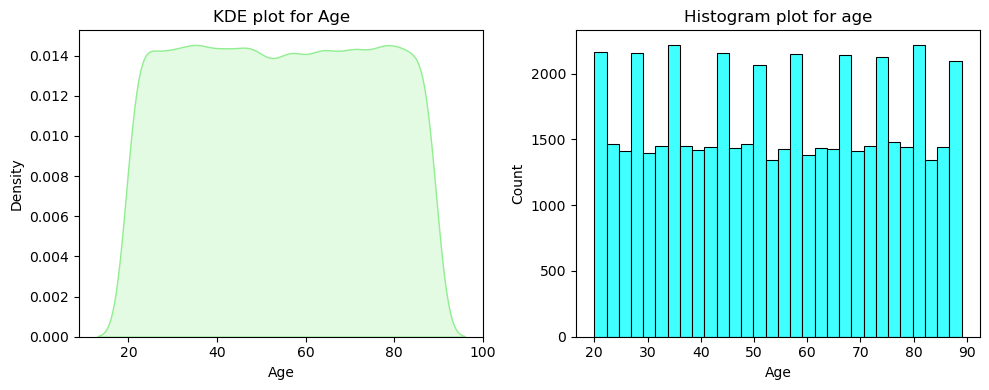

In [6]:
#plotting for age column
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Age"], fill= True, color="lightgreen")
plt.title("KDE plot for Age")

plt.subplot(1,2,2)
sns.histplot(data["Age"], bins=30, kde= False, color= "cyan")
plt.title("Histogram plot for age")

plt.tight_layout()
plt.show()

In [7]:
data['Age'].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

## INFERENCE 

- Range = 20 to 89 
- Mean Age: 54.42  Years
- Standard Deviation = 20.22
- Interquartile Range (IQR): 37 (Q1) to 72(Q3)
- This suggested a broad represenation of both young and elderly patients in the dataset, which supports age based comparative analysis.


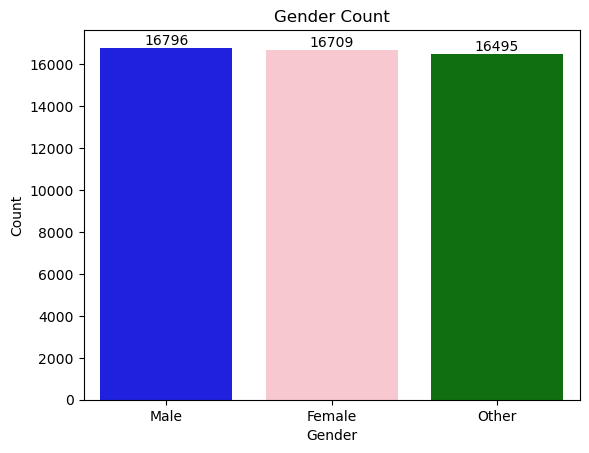

In [8]:
# gender 
data["Gender"].value_counts()

sns.barplot(
    x = data["Gender"].value_counts().index,
    y = data['Gender'].value_counts().values,
    palette=["blue","pink","green"]
)

for i, v in enumerate(data["Gender"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

- the dataset contains three gender categories(Male, Feamale, Other) with the most common being Male(16,796 record). Gender
distribution is sufficient for evaluating gender specific survival trends and severity outcomes.

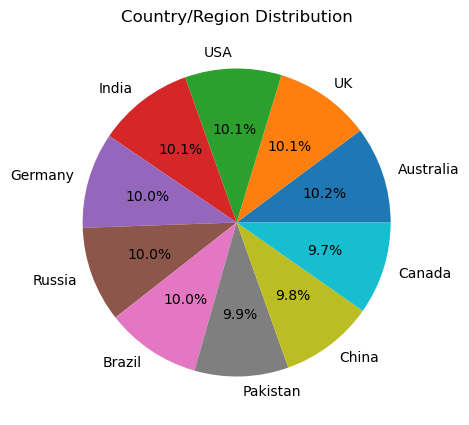

In [9]:
# countries column 
country_counts = data["Country_Region"].value_counts()

plt.figure(figsize = (5,5))
plt.pie(
     x = country_counts.values,
    labels=country_counts.index,
    autopct='%1.1f%%'
)

plt.title("Country/Region Distribution")
plt.show()

- Patients come from 10 different countries/regions, with Australia being the most represented(5,092 patients). Number of data points for each country is almost same. This diversity enables cross country comparison of cancer outcomes and tratment economic.

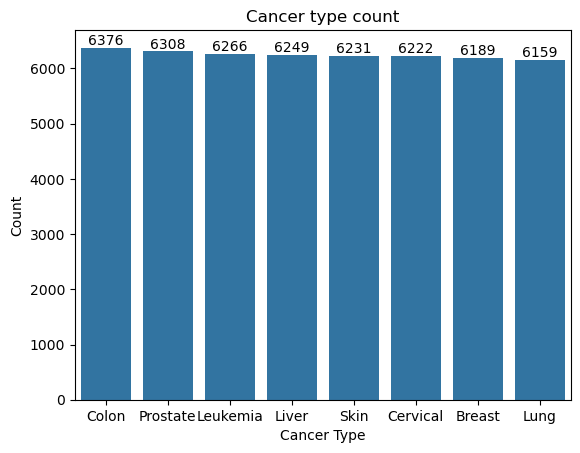

In [10]:
# cancer type 

data["Cancer_Type"].value_counts()

sns.barplot(
    x = data["Cancer_Type"].value_counts().index,
    y = data["Cancer_Type"].value_counts().values)

for i, v in enumerate(data["Cancer_Type"].value_counts()):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.title("Cancer type count")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.show()


- we have in total 8 types of cancer, with ecah cancer having same number of data point under the label, most common cancer are colon cancer followed by Postate cancer.

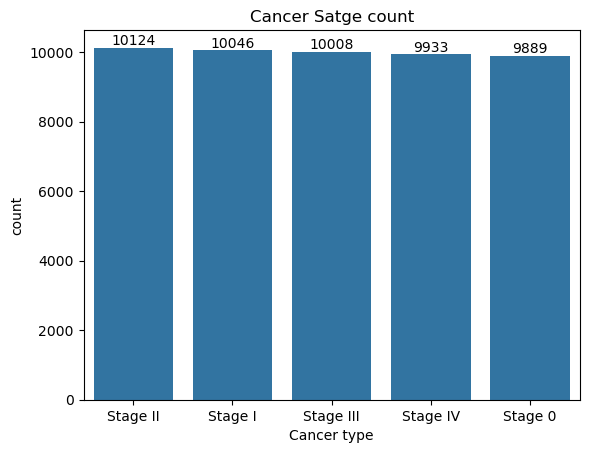

In [11]:
# cancer stage

data["Cancer_Stage"].value_counts()

sns.barplot(
    x = data["Cancer_Stage"].value_counts().index,
    y = data["Cancer_Stage"].value_counts().values)

for i, v in enumerate(data["Cancer_Stage"].value_counts()):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.title("Cancer Satge count")
plt.xlabel("Cancer type")
plt.ylabel("count")
plt.show()

Cancer Stage have 5 stages with values ranging from 0 to 4, with stage 2 the most common one, and each stage have almost same number of data points under its label.

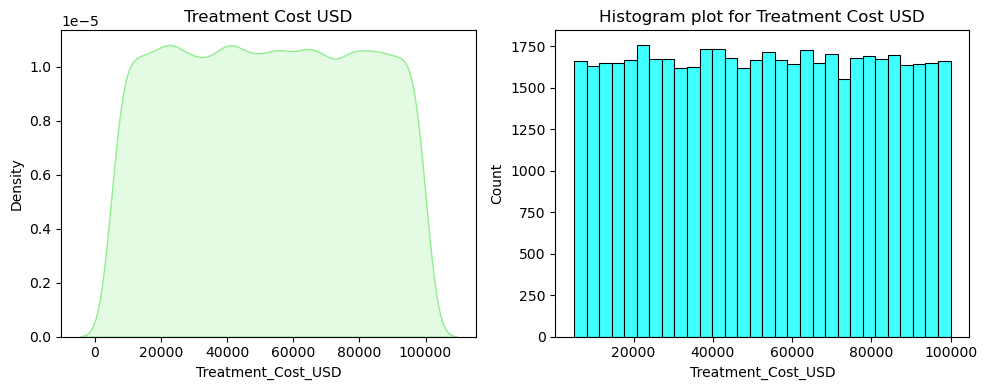

In [12]:
# plotting for treatment cost 

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Treatment_Cost_USD"], fill= True, color="lightgreen")
plt.title("Treatment Cost USD")

plt.subplot(1,2,2)
sns.histplot(data["Treatment_Cost_USD"], bins=30, kde= False, color= "cyan")
plt.title("Histogram plot for Treatment Cost USD")

plt.tight_layout()
plt.show()

In [13]:
data["Treatment_Cost_USD"].describe()

count    50000.000000
mean     52467.298239
std      27363.229379
min       5000.050000
25%      28686.225000
50%      52474.310000
75%      76232.720000
max      99999.840000
Name: Treatment_Cost_USD, dtype: float64

- Treatment cost usd have no skewness , and there are almost same number of data points under each bin as observed by histogram

In [14]:
# Analylizing the Risk Factors

column_of_interest =[ 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

summary = data[column_of_interest].agg(["mean", "std", "min", "max"])
summary

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


- These variables have indentical menas and standard menas and standard deviation, indicating they were likely desgined on the same standardized scale. Ther are essentail in studing interacting effects (e.g., genetic risk * somking) on survial.

## Determine the relationship between risk factors and cancer severity

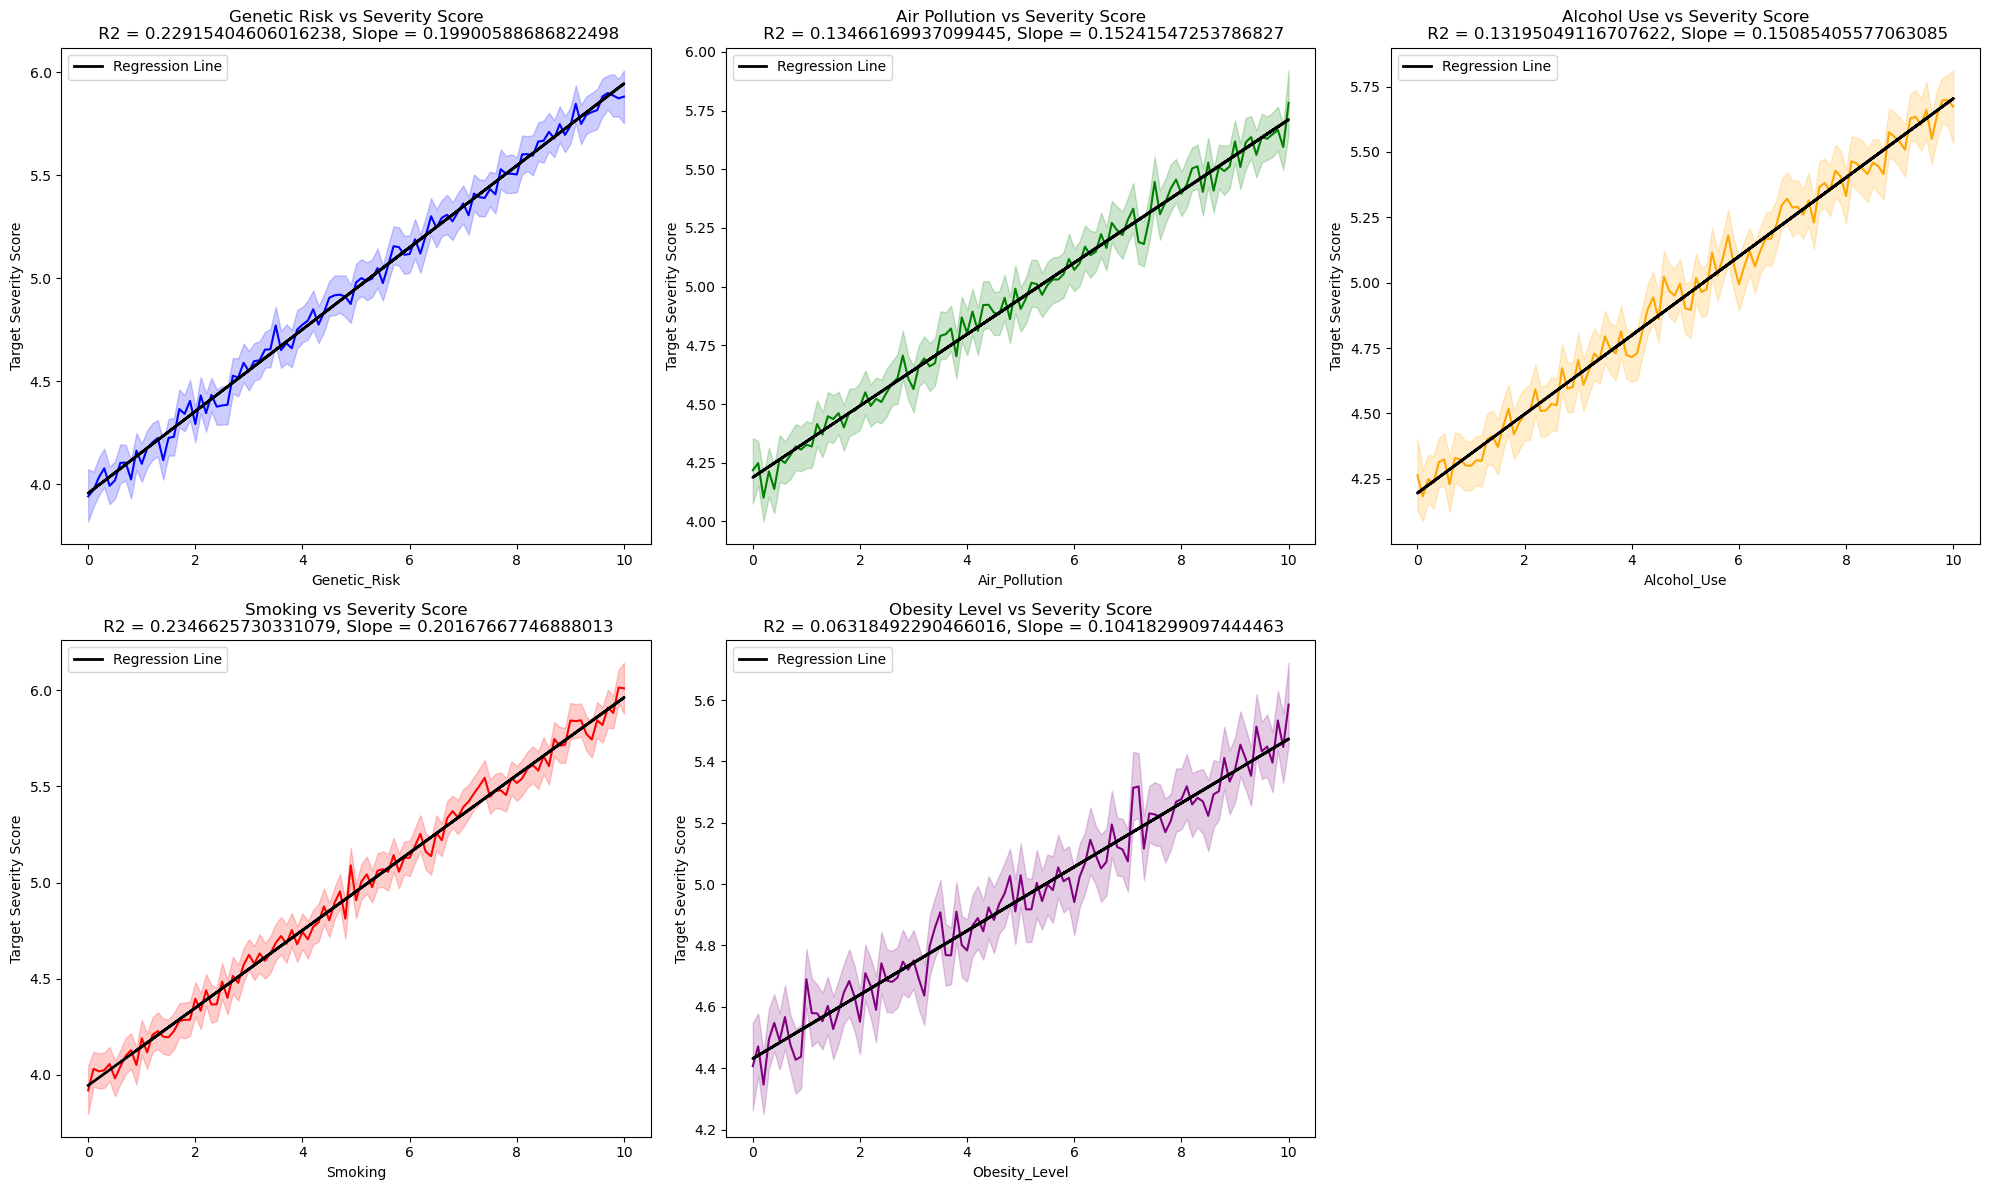

In [15]:
from scipy.stats import linregress

risk_fectors =[ 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
titles = [ 'Genetic Risk', 'Air Pollution', 'Alcohol Use', 'Smoking', 'Obesity Level']
colors = ["blue", "green","orange","red","purple"]

plt.figure(figsize=(20,12))
for i, (factor, title, color) in enumerate(zip(risk_fectors, titles, colors),1):
    plt.subplot(2,3,i)

    x = data[factor]
    y = data["Target_Severity_Score"]
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    r_squared = r_value**2 

    sns.lineplot(x=factor, y="Target_Severity_Score", data=data, color=color)
    plt.plot(x,x*slope+intercept, color="black", linewidth =2, label= "Regression Line")
    plt.title(f"{title} vs Severity Score\n R2 = {r_squared}, Slope = {slope}")
    plt.xlabel(factor)
    plt.ylabel("Target Severity Score")
    plt.legend()

plt.tight_layout()
plt.show()


## Analyze the proportion of early-stage diagnoses by cancer type

In [16]:
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [17]:
stage_count = data[data["Cancer_Type"]== "Lung"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of lungs cancer diagnosed at stage 0 and stage 1: {proportion}")

proportion of lungs cancer diagnosed at stage 0 and stage 1: 38.43156356551388


In [18]:
stage_count = data[data["Cancer_Type"]== "Leukemia"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Leukemia cancer diagnosed at stage 0 and stage 1: {proportion}")

proportion of Leukemia cancer diagnosed at stage 0 and stage 1: 39.53080114905841


In [19]:
stage_count = data[data["Cancer_Type"]== "Breast"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Breast cancer diagnosed at stage 0 and stage 1: {proportion}")

proportion of Breast cancer diagnosed at stage 0 and stage 1: 39.47325900791727


In [20]:
stage_count = data[data["Cancer_Type"]== "Colon"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Colon cancer diagnosed at stage 0 and stage 1: {proportion}")

proportion of Colon cancer diagnosed at stage 0 and stage 1: 40.41718946047679


In [21]:
stage_count = data[data["Cancer_Type"]== "Skin"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Skin cancer diagnosed at stage 0 and stage 1: {proportion}")

proportion of Skin cancer diagnosed at stage 0 and stage 1: 40.41084898090194


In [22]:
stage_count = data[data["Cancer_Type"]== "Cervical"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Cervical cancer diagnosed at stage 0 and stage 1: {proportion}")

proportion of Cervical cancer diagnosed at stage 0 and stage 1: 39.85856637737062


In [23]:
stage_count = data[data["Cancer_Type"]== "Prostate"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Prostate cancer diagnosed at stage 0 and stage 1: {proportion}")

proportion of Prostate cancer diagnosed at stage 0 and stage 1: 40.187064045656314


In [24]:
stage_count = data[data["Cancer_Type"]== "Prostate"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Prostate cancer diagnosed at stage 0 and stage 1: {proportion}")

proportion of Prostate cancer diagnosed at stage 0 and stage 1: 40.187064045656314


In [25]:
stage_count = data[data["Cancer_Type"]== "Liver"]["Cancer_Stage"].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Liver cancer diagnosed at stage 0 and stage 1: {proportion}")

proportion of Liver cancer diagnosed at stage 0 and stage 1: 40.614498319731155


## Identify key predictors of cancer severity and survival years.

In [26]:
features =[ 'Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

targets = ["Survival_Years", "Target_Severity_Score"]

#calculate correlations 
pearson_corr = data[features+targets].corr(method="pearson")
spearman_corr = data[features+targets].corr(method="spearman")

# slice out only the realtionship with target variables 
pearson_results = pearson_corr[targets]
spearman_results = spearman_corr[targets]

#combine both 
correlation_df = pd.concat([pearson_results,spearman_results], axis =1, keys=["Pearson","Spearman"])
correlation_df

Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

In [27]:
# random forest for target severity score 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score


# converting categorical column to numerical columns 
categorical_cols = ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


#Preparing features and input 
X = data.drop(columns = ["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity = data["Target_Severity_Score"]

#train test split 
X_train_s,X_test_s, y_train_s, y_test_s = train_test_split(X, y_severity, test_size=0.2, random_state=40)

# train the model 
model = RandomForestRegressor(n_estimators= 200, max_depth=None, min_samples_split =2, min_samples_leaf = 1, random_state=40)
model.fit(X_train_s,y_train_s)

# evalaute the model 
train_r2_severity = r2_score(y_train_s, model.predict(X_train_s))
test_r2_severity = r2_score(y_test_s, model.predict(X_test_s))

In [28]:
print(train_r2_severity)
print(test_r2_severity)

0.9689503792116058
0.7752278237418935


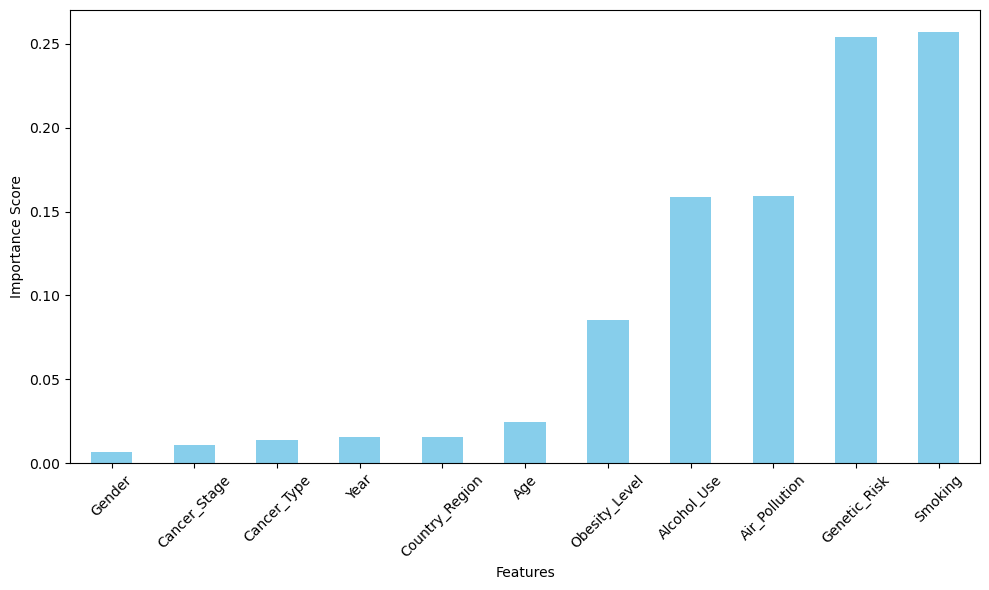

In [29]:
feature_importance_severity = pd.Series(model.feature_importances_,index = X.columns,).sort_values(ascending = True)

# plotting of importance features 
plt.figure(figsize = (10,6))
feature_importance_severity.plot(kind='bar', color='skyblue')
plt.title = ("Feature Importance for target Severity Score (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [30]:
# random forest for target severity score 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score


# converting categorical column to numerical columns 
categorical_cols = ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


#Preparing features and input 
X = data.drop(columns = ["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity = data["Survival_Years"]

#train test split 
X_train_s,X_test_s, y_train_s, y_test_s = train_test_split(X, y_severity, test_size=0.2, random_state=40)

param_grid = {
    'n_estimators': [100,200],
    'max_depth': [5,10, None],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}

# train the model 
model = RandomForestRegressor(random_state=40)
GSC = GridSearchCV(model, param_grid,cv=3,scoring="r2", n_jobs=-1)
GSC.fit(X_train_s,y_train_s)

best_rf_severity = GSC.best_estimator_
# evalaute the model 
train_r2_severity = r2_score(y_train_s, best_rf_severity.predict(X_train_s))
test_r2_severity = r2_score(y_test_s, best_rf_severity.predict(X_test_s))

In [31]:
print(train_r2_severity)
print(test_r2_severity)

0.008998065861791305
-0.0003487352301705382


<Axes: xlabel='Survival_Years', ylabel='Count'>

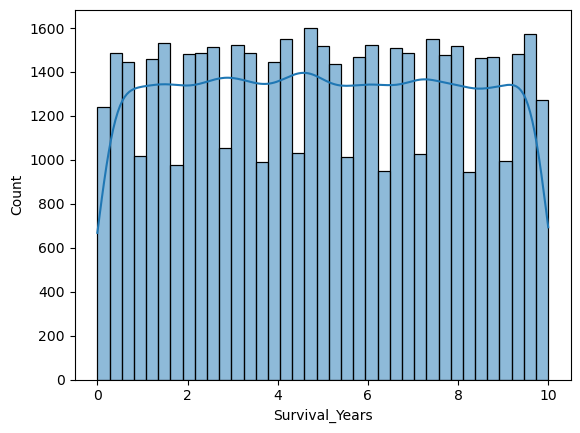

In [32]:
import seaborn as sns 
sns.histplot(data["Survival_Years"], kde=True)

In [33]:
data.corr(numeric_only=True)["Survival_Years"].sort_values(ascending =True)

Gender                  -0.007121
Cancer_Stage            -0.003014
Cancer_Type             -0.001717
Alcohol_Use             -0.000527
Treatment_Cost_USD      -0.000429
Age                     -0.000147
Year                     0.000018
Air_Pollution            0.000893
Smoking                  0.001371
Genetic_Risk             0.001708
Target_Severity_Score    0.004161
Country_Region           0.005121
Obesity_Level            0.009771
Survival_Years           1.000000
Name: Survival_Years, dtype: float64

## Explore  the economic burden of cancer treatment across different demographics and countries

In [34]:
data = pd.read_csv("global_cancer_patients_2015_2024.csv")

In [35]:
df = data.copy()

In [36]:
data["Age_Group"] = pd.cut(data["Age"], bins=[0,20,45,60,75,100], labels=["0-30","31-45","46-60","61-75","76+"])

In [37]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Age_Group
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,61-75
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,31-45
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,76+
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,31-45
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63,76+
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03,31-45
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02,61-75
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54,31-45


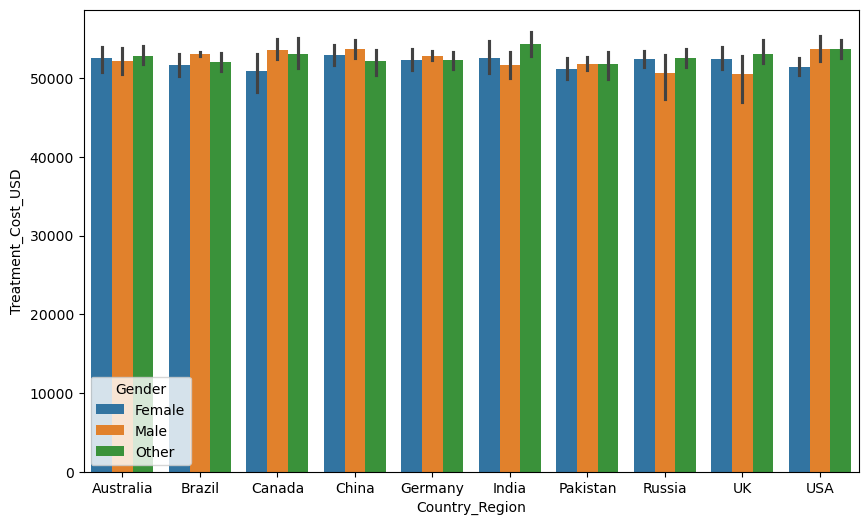

In [38]:
country_age_cost = data.groupby(["Country_Region", "Age_Group", "Gender"]) ["Treatment_Cost_USD"].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=country_age_cost, x ="Country_Region", y ="Treatment_Cost_USD", hue="Gender")
# plt.title("Average cancer treatment cost by country and gender")
plt.show()

In [39]:
country_age_cost = data.groupby(["Country_Region", "Age_Group"]) ["Treatment_Cost_USD"].mean().reset_index()


In [40]:
heatmap_data = country_age_cost.pivot(index="Age_Group", columns="Country_Region", values="Treatment_Cost_USD")

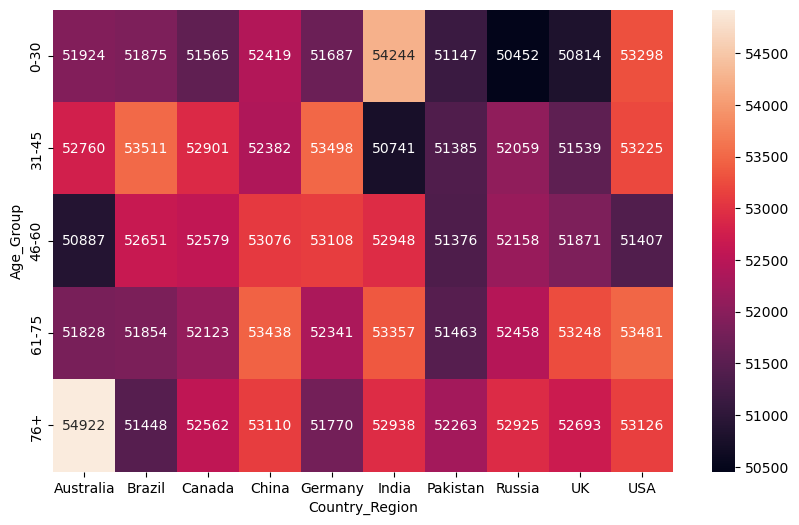

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot =True, fmt=".0f")
# plt.title("Average Treatment cost by Age Group and Country")
plt.show()

## Assess whether higher treatment cost is associated with longer survival

In [42]:
from scipy.stats import pearsonr, spearmanr
x = data["Treatment_Cost_USD"]
y = data["Survival_Years"]

# performing pearson correlartion test
pearson_corr, pearson_p = pearsonr(x,y)
print(f"Pearson Correlation Coefficient : {pearson_corr}")
print(f"Pearson P-Value: {pearson_p}")


# spearmanr correlartion test
spearman_corr, spearman_p = pearsonr(x,y)
print(f"spearman Correlation Coefficient : {spearman_corr}")
print(f"spearman P-Value: {spearman_p}")

alpha = 0.05

def interpret_corr(corr,p,method):
    if p<alpha:
        print(f"{method}, we reject the null hypothesis")
    else:
        print(f"{method}, we failed to reject null hypothesis")

interpret_corr(pearson_corr, pearson_p, "pearson" )
interpret_corr(spearman_corr, spearman_p, "spearman")

Pearson Correlation Coefficient : -0.00042940542830214955
Pearson P-Value: 0.9235082012963326
spearman Correlation Coefficient : -0.00042940542830214955
spearman P-Value: 0.9235082012963326
pearson, we failed to reject null hypothesis
spearman, we failed to reject null hypothesis


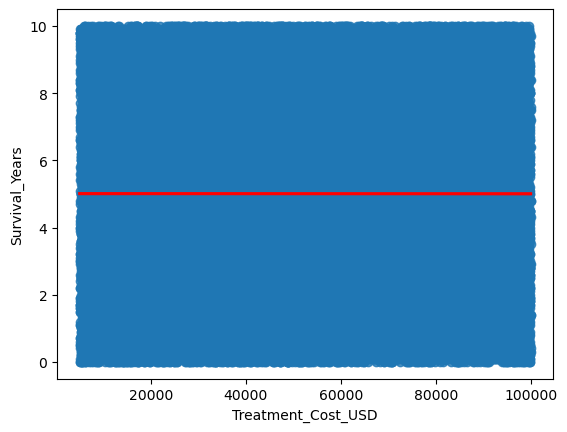

In [43]:
sns.regplot(x=x, y=y, line_kws={"color":"red"})
plt.show()

## Evaluate if higher cancer stages lead to greater treatment costs and reduced survival years

In [44]:
df = data.copy()

In [45]:
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']

In [46]:
grouped_stats = df.groupby("Cancer_Stage")[["Treatment_Cost_USD", "Survival_Years"]].mean().reset_index()

In [47]:
grouped_stats

,Cancer_Stage,Treatment_Cost_USD,Survival_Years
0,Stage 0,52572.589493,5.015199
1,Stage I,52674.079638,5.012990
2,Stage II,52082.841258,4.995170
3,Stage III,52708.197506,5.036311
4,Stage IV,52302.471041,4.972596


In [48]:
grouped_costs = []
grouped_survival = []

for stage in stage_order:
    stage_data = df[df["Cancer_Stage"]== stage]
    cost = stage_data["Treatment_Cost_USD"]
    survival = stage_data["Survival_Years"]
    grouped_costs.append(cost)
    grouped_survival.append(survival)

In [49]:
# check for normality 
from scipy.stats import shapiro, f_oneway
normal_cost = 0
normal_survival = 0
for i in range (len(stage_order)):
    cost_p = shapiro(grouped_costs[i]).pvalue
    surv_p = shapiro(grouped_costs[i]).pvalue
    print(f"cost {cost_p} for group {i}")
    print(f"Survival {surv_p} for group {i}" )
    if cost_p<0.05:
        normal_cost += 1
    if surv_p < 0.05:
        normal_survival += 1

cost 1.5471821061637387e-47 for group 0
Survival 1.5471821061637387e-47 for group 0
cost 7.306523956950957e-48 for group 1
Survival 7.306523956950957e-48 for group 1
cost 8.943579643043388e-48 for group 2
Survival 8.943579643043388e-48 for group 2
cost 5.267270033022367e-48 for group 3
Survival 5.267270033022367e-48 for group 3
cost 1.5838640189581322e-47 for group 4
Survival 1.5838640189581322e-47 for group 4


In [50]:
print(normal_cost)
print(normal_survival)

5
5


In [51]:
from scipy.stats import kruskal

In [52]:
kruskal_cost = kruskal(*grouped_costs)
kruskal_survival = kruskal(*grouped_survival)

p_cost = kruskal_cost.pvalue
p_survival = kruskal_survival.pvalue


In [53]:
p_cost

np.float64(0.4254451689062656)

In [54]:
p_survival

np.float64(0.6033078729984223)

## Examine wheather higher genetic risk amplifies the negative effects of someking on cancer severity

In [55]:
import statsmodels.formula.api as smf 
model = smf.ols("Target_Severity_Score ~ Genetic_Risk * Smoking", data=data).fit()

model.summary2().tables[1].loc["Genetic_Risk:Smoking"]

Coef.      -0.000228
Std.Err.    0.000471
t          -0.484187
P>|t|       0.628255
[0.025     -0.001150
0.975]      0.000694
Name: Genetic_Risk:Smoking, dtype: float64

In [56]:
p_value = 0.628255